# 02 - Prétraitement des Données pour TensorFlow

**Objectif du notebook :**
- Chargement et exploration des données
- Nettoyage et traitement des valeurs manquantes
- Encodage des variables catégorielles
- Feature engineering
- Normalisation et standardisation
- Séparation des données (train/validation/test)
- Préparation spécifique pour TensorFlow

**Cibles du modèle :**
- **Régression multi-sorties** : Project_Grade, Quiz_Score_Avg, Progress_Percentage, Satisfaction_Rating
- **Classification binaire** : Completed (Completed/Not Completed)

---

## 1. Imports et Configuration

In [7]:
"""Importation des bibliothèques nécessaires."""

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Utilities
import warnings
import pickle
from datetime import datetime

warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Seed pour la reproductibilité
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✓ Bibliothèques importées avec succès")
print(f"✓ Random state configuré : {RANDOM_STATE}")

✓ Bibliothèques importées avec succès
✓ Random state configuré : 42


## 2. Chargement des Données

In [8]:
"""Chargement du dataset et inspection initiale."""

# Chargement
df = pd.read_csv('../data/Course_Completion_Prediction.csv')

print("="*70)
print(" INFORMATIONS GÉNÉRALES")
print("="*70)
print(f"Nombre de lignes : {df.shape[0]:,}")
print(f"Nombre de colonnes : {df.shape[1]}")
print(f"Mémoire utilisée : {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Aperçu des premières lignes
print("\n" + "="*70)
print(" APERÇU DES DONNÉES")
print("="*70)
df.head()

 INFORMATIONS GÉNÉRALES
Nombre de lignes : 100,000
Nombre de colonnes : 40
Mémoire utilisée : 122.84 MB

 APERÇU DES DONNÉES


,Student_ID,Name,Gender,Age,Education_Level,Employment_Status,City,Device_Type,Internet_Connection_Quality,Course_ID,...,Enrollment_Date,Payment_Mode,Fee_Paid,Discount_Used,Payment_Amount,App_Usage_Percentage,Reminder_Emails_Clicked,Support_Tickets_Raised,Satisfaction_Rating,Completed
0,STU100000,Vihaan Patel,Male,19,Diploma,Student,Indore,Laptop,Medium,C102,...,01-06-2024,Scholarship,No,No,1740,49,3,4,3.5,Completed
1,STU100001,Arjun Nair,Female,17,Bachelor,Student,Delhi,Laptop,Low,C106,...,27-04-2025,Credit Card,Yes,No,6147,86,0,0,4.5,Not Completed
2,STU100002,Aditya Bhardwaj,Female,34,Master,Student,Chennai,Mobile,Medium,C101,...,20-01-2024,NetBanking,Yes,No,4280,85,1,0,5.0,Completed
3,STU100003,Krishna Singh,Female,29,Diploma,Employed,Surat,Mobile,High,C105,...,13-05-2025,UPI,Yes,No,3812,42,2,3,3.8,Completed
4,STU100004,Krishna Nair,Female,19,Master,Self-Employed,Lucknow,Laptop,Medium,C106,...,19-12-2024,Debit Card,Yes,Yes,5486,91,3,0,4.0,Completed


In [9]:
"""Analyse des types de données et des valeurs manquantes."""

# Création d'un tableau récapitulatif
data_info = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes.values,
    'Non_Null': df.notnull().sum().values,
    'Null_Count': df.isnull().sum().values,
    'Null_Pct': (df.isnull().sum().values / len(df) * 100).round(2),
    'Unique': df.nunique().values,
    'Sample_Values': [df[col].head(3).tolist() for col in df.columns]
})

print("="*70)
print(" ANALYSE DES COLONNES")
print("="*70)
display(data_info)

# Distribution des types
print("\n" + "="*70)
print(" DISTRIBUTION DES TYPES")
print("="*70)
print(df.dtypes.value_counts())

 ANALYSE DES COLONNES


,Column,Data_Type,Non_Null,Null_Count,Null_Pct,Unique,Sample_Values
0,Student_ID,object,100000,0,0.0,100000,"[STU100000, STU100001, STU100002]"
1,Name,object,100000,0,0.0,300,"[Vihaan Patel, Arjun Nair, Aditya Bhardwaj]"
2,Gender,object,100000,0,0.0,3,"[Male, Female, Female]"
3,Age,int64,100000,0,0.0,34,"[19, 17, 34]"
4,Education_Level,object,100000,0,0.0,5,"[Diploma, Bachelor, Master]"
5,Employment_Status,object,100000,0,0.0,4,"[Student, Student, Student]"
6,City,object,100000,0,0.0,15,"[Indore, Delhi, Chennai]"
7,Device_Type,object,100000,0,0.0,3,"[Laptop, Laptop, Mobile]"
8,Internet_Connection_Quality,object,100000,0,0.0,3,"[Medium, Low, Medium]"
9,Course_ID,object,100000,0,0.0,8,"[C102, C106, C101]"



 DISTRIBUTION DES TYPES
object     17
int64      15
float64     8
Name: count, dtype: int64


## 3. Définition des Variables Cibles et Features

In [10]:
"""Définition des variables cibles et des features."""

# Colonnes à exclure (identifiants et cibles)
ID_COLS = ['Student_ID', 'Name']

# Variables cibles pour la régression multi-sorties
REGRESSION_TARGETS = [
    'Project_Grade',           # Note du projet (0-100)
    'Quiz_Score_Avg',          # Score moyen des quiz (0-100)
    'Progress_Percentage',     # Pourcentage de progression (0-100)
    'Satisfaction_Rating'      # Note de satisfaction (1-5)
]

# Variable cible pour la classification binaire
CLASSIFICATION_TARGET = 'Completed'  # Completed / Not Completed

# Colonnes de features (tout sauf ID et targets)
ALL_TARGETS = REGRESSION_TARGETS + [CLASSIFICATION_TARGET]
FEATURE_COLS = [col for col in df.columns 
                if col not in ID_COLS + ALL_TARGETS]

print("="*70)
print(" CONFIGURATION DES VARIABLES")
print("="*70)
print(f"\nNombre total de features : {len(FEATURE_COLS)}")
print(f"\nFeatures utilisées :")
for i, col in enumerate(FEATURE_COLS, 1):
    print(f"  {i:2d}. {col}")

print(f"\n\nCibles de régression ({len(REGRESSION_TARGETS)}) :")
for target in REGRESSION_TARGETS:
    print(f"  - {target}")

print(f"\nCible de classification :")
print(f"  - {CLASSIFICATION_TARGET}")

 CONFIGURATION DES VARIABLES

Nombre total de features : 33

Features utilisées :
   1. Gender
   2. Age
   3. Education_Level
   4. Employment_Status
   5. City
   6. Device_Type
   7. Internet_Connection_Quality
   8. Course_ID
   9. Course_Name
  10. Category
  11. Course_Level
  12. Course_Duration_Days
  13. Instructor_Rating
  14. Login_Frequency
  15. Average_Session_Duration_Min
  16. Video_Completion_Rate
  17. Discussion_Participation
  18. Time_Spent_Hours
  19. Days_Since_Last_Login
  20. Notifications_Checked
  21. Peer_Interaction_Score
  22. Assignments_Submitted
  23. Assignments_Missed
  24. Quiz_Attempts
  25. Rewatch_Count
  26. Enrollment_Date
  27. Payment_Mode
  28. Fee_Paid
  29. Discount_Used
  30. Payment_Amount
  31. App_Usage_Percentage
  32. Reminder_Emails_Clicked
  33. Support_Tickets_Raised


Cibles de régression (4) :
  - Project_Grade
  - Quiz_Score_Avg
  - Progress_Percentage
  - Satisfaction_Rating

Cible de classification :
  - Completed


## 4. Analyse Exploratoire des Cibles

 STATISTIQUES DES CIBLES DE RÉGRESSION
       Project_Grade  Quiz_Score_Avg  Progress_Percentage  Satisfaction_Rating
count  100000.000000   100000.000000        100000.000000        100000.000000
mean       68.189534       73.276201            53.823104             4.132128
std        15.312036       12.552344            12.495622             0.700895
min         0.000000       19.600000             7.600000             1.000000
25%        57.700000       64.700000            45.400000             3.700000
50%        68.300000       73.300000            53.900000             4.200000
75%        78.800000       82.000000            62.400000             4.700000
max       100.000000      100.000000            98.600000             5.000000


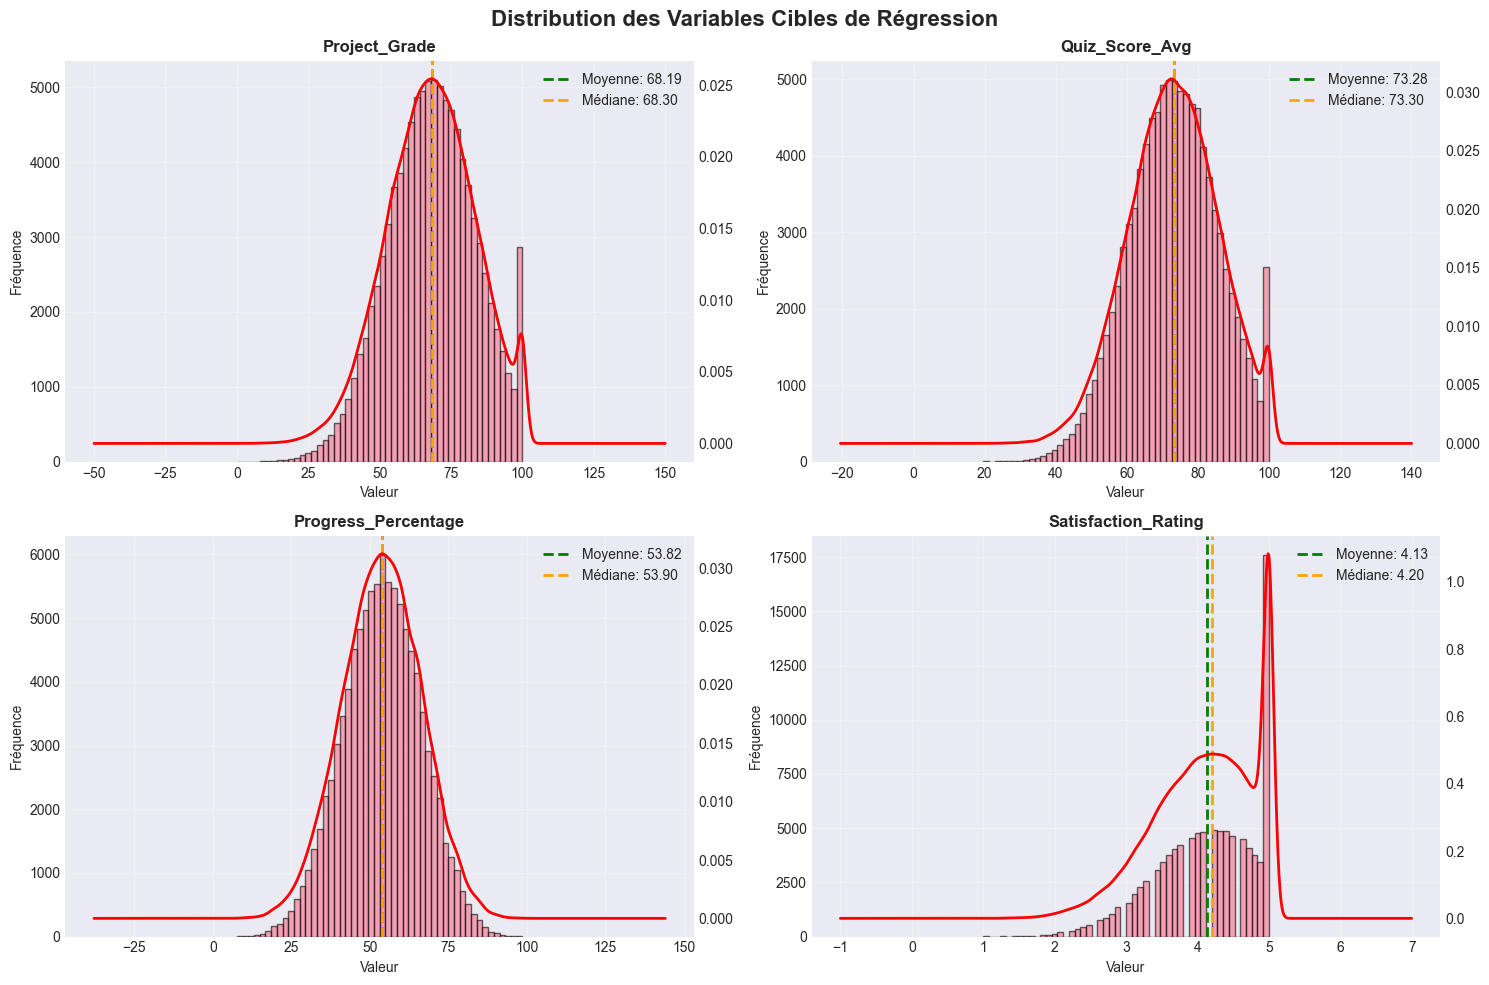

In [11]:
"""Analyse des variables cibles de régression."""

print("="*70)
print(" STATISTIQUES DES CIBLES DE RÉGRESSION")
print("="*70)
print(df[REGRESSION_TARGETS].describe())

# Visualisation des distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution des Variables Cibles de Régression', fontsize=16, fontweight='bold')

for idx, target in enumerate(REGRESSION_TARGETS):
    ax = axes[idx // 2, idx % 2]
    
    # Histogramme + KDE
    df[target].hist(bins=50, ax=ax, alpha=0.6, edgecolor='black')
    df[target].plot(kind='density', ax=ax, secondary_y=True, color='red', linewidth=2)
    
    ax.set_title(f'{target}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Valeur')
    ax.set_ylabel('Fréquence')
    ax.grid(True, alpha=0.3)
    
    # Statistiques sur le graphique
    mean_val = df[target].mean()
    median_val = df[target].median()
    ax.axvline(mean_val, color='green', linestyle='--', linewidth=2, label=f'Moyenne: {mean_val:.2f}')
    ax.axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Médiane: {median_val:.2f}')
    ax.legend()

plt.tight_layout()
plt.show()

 ANALYSE DE LA CIBLE DE CLASSIFICATION

Distribution des classes :
  Not Completed   : 50,970 (50.97%)
  Completed       : 49,030 (49.03%)

Ratio de déséquilibre : 1.04:1


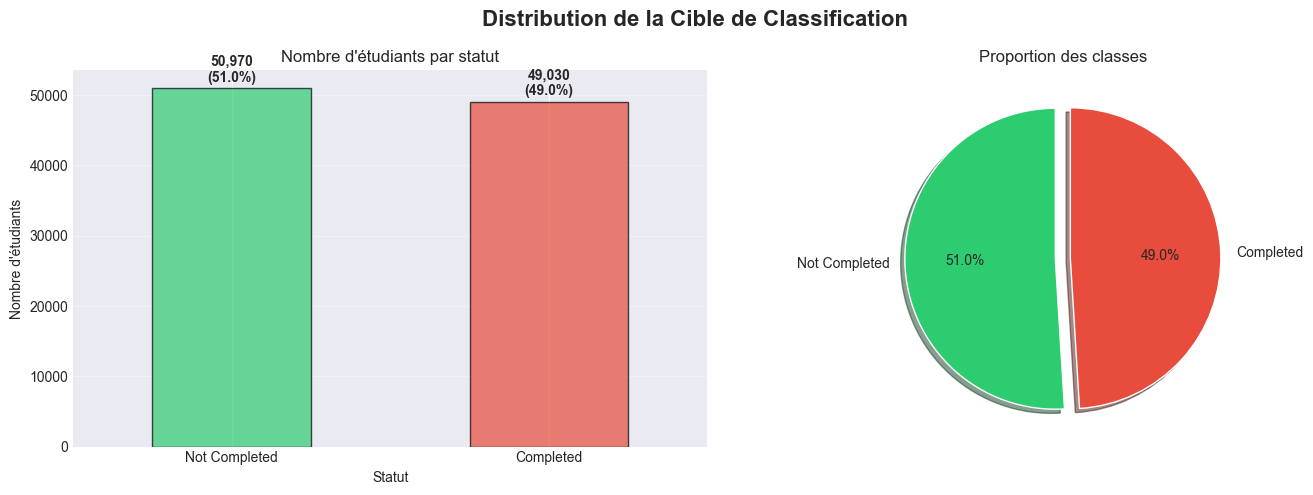

In [12]:
"""Analyse de la variable cible de classification."""

print("="*70)
print(" ANALYSE DE LA CIBLE DE CLASSIFICATION")
print("="*70)

# Distribution des classes
completion_counts = df[CLASSIFICATION_TARGET].value_counts()
completion_pct = df[CLASSIFICATION_TARGET].value_counts(normalize=True) * 100

print(f"\nDistribution des classes :")
for status in completion_counts.index:
    count = completion_counts[status]
    pct = completion_pct[status]
    print(f"  {status:15s} : {count:6,} ({pct:5.2f}%)")

# Calcul du déséquilibre
imbalance_ratio = completion_counts.max() / completion_counts.min()
print(f"\nRatio de déséquilibre : {imbalance_ratio:.2f}:1")

if imbalance_ratio > 1.5:
    print("⚠️  ATTENTION : Déséquilibre des classes détecté !")
    print("   Considérer : class_weight, SMOTE, ou stratified sampling")

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Distribution de la Cible de Classification', fontsize=16, fontweight='bold')

# Diagramme en barres
completion_counts.plot(kind='bar', ax=ax1, color=['#2ecc71', '#e74c3c'], edgecolor='black', alpha=0.7)
ax1.set_title('Nombre d\'étudiants par statut')
ax1.set_xlabel('Statut')
ax1.set_ylabel('Nombre d\'étudiants')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(axis='y', alpha=0.3)

# Ajout des valeurs sur les barres
for i, v in enumerate(completion_counts):
    ax1.text(i, v + 500, f'{v:,}\n({completion_pct.iloc[i]:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')

# Diagramme circulaire
colors = ['#2ecc71', '#e74c3c']
explode = (0.05, 0.05)
ax2.pie(completion_counts, labels=completion_counts.index, autopct='%1.1f%%',
        colors=colors, explode=explode, shadow=True, startangle=90)
ax2.set_title('Proportion des classes')

plt.tight_layout()
plt.show()

## 5. Identification et Traitement des Types de Variables

In [13]:
"""Identification des variables numériques et catégorielles."""

# Extraction du sous-ensemble de features
df_features = df[FEATURE_COLS].copy()

# Identification automatique des types
numerical_features = df_features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_features.select_dtypes(include=['object']).columns.tolist()

# Traitement spécial pour la date d'inscription
if 'Enrollment_Date' in categorical_features:
    categorical_features.remove('Enrollment_Date')
    date_feature = 'Enrollment_Date'
else:
    date_feature = None

print("="*70)
print(" TYPES DE FEATURES IDENTIFIÉS")
print("="*70)

print(f"\nFeatures numériques ({len(numerical_features)}) :")
for feat in numerical_features:
    print(f"  - {feat}")

print(f"\nFeatures catégorielles ({len(categorical_features)}) :")
for feat in categorical_features:
    unique_count = df[feat].nunique()
    print(f"  - {feat:35s} ({unique_count:3d} valeurs uniques)")

if date_feature:
    print(f"\nFeature date :")
    print(f"  - {date_feature}")

 TYPES DE FEATURES IDENTIFIÉS

Features numériques (19) :
  - Age
  - Course_Duration_Days
  - Instructor_Rating
  - Login_Frequency
  - Average_Session_Duration_Min
  - Video_Completion_Rate
  - Discussion_Participation
  - Time_Spent_Hours
  - Days_Since_Last_Login
  - Notifications_Checked
  - Peer_Interaction_Score
  - Assignments_Submitted
  - Assignments_Missed
  - Quiz_Attempts
  - Rewatch_Count
  - Payment_Amount
  - App_Usage_Percentage
  - Reminder_Emails_Clicked
  - Support_Tickets_Raised

Features catégorielles (13) :
  - Gender                              (  3 valeurs uniques)
  - Education_Level                     (  5 valeurs uniques)
  - Employment_Status                   (  4 valeurs uniques)
  - City                                ( 15 valeurs uniques)
  - Device_Type                         (  3 valeurs uniques)
  - Internet_Connection_Quality         (  3 valeurs uniques)
  - Course_ID                           (  8 valeurs uniques)
  - Course_Name               

## 6. Feature Engineering

In [14]:
"""Feature engineering et création de nouvelles variables."""

# Copie du dataframe pour les transformations
df_processed = df.copy()

print("="*70)
print(" FEATURE ENGINEERING")
print("="*70)

# 1. Traitement de la date d'inscription
if date_feature and date_feature in df_processed.columns:
    print(f"\n1. Traitement de {date_feature}...")
    df_processed[date_feature] = pd.to_datetime(df_processed[date_feature], format='%d-%m-%Y')
    
    # Extraction des composantes temporelles
    df_processed['Enrollment_Month'] = df_processed[date_feature].dt.month
    df_processed['Enrollment_DayOfWeek'] = df_processed[date_feature].dt.dayofweek
    df_processed['Enrollment_Quarter'] = df_processed[date_feature].dt.quarter
    
    # Calcul de l'ancienneté (jours depuis l'inscription)
    reference_date = df_processed[date_feature].max()
    df_processed['Days_Since_Enrollment'] = (reference_date - df_processed[date_feature]).dt.days
    
    # Suppression de la date originale
    df_processed = df_processed.drop(columns=[date_feature])
    
    new_date_features = ['Enrollment_Month', 'Enrollment_DayOfWeek', 
                         'Enrollment_Quarter', 'Days_Since_Enrollment']
    print(f"   ✓ Créées : {', '.join(new_date_features)}")

# 2. Features d'engagement
print("\n2. Création de features d'engagement...")

# Taux de complétion des devoirs
df_processed['Assignment_Completion_Rate'] = (
    df_processed['Assignments_Submitted'] / 
    (df_processed['Assignments_Submitted'] + df_processed['Assignments_Missed'])
) * 100

# Score d'activité global
df_processed['Activity_Score'] = (
    df_processed['Login_Frequency'] * 
    df_processed['Average_Session_Duration_Min'] * 
    df_processed['Video_Completion_Rate'] / 100
)

# Engagement avec les quiz
df_processed['Quiz_Engagement'] = (
    df_processed['Quiz_Attempts'] * df_processed['Quiz_Score_Avg']
)

engagement_features = ['Assignment_Completion_Rate', 'Activity_Score', 'Quiz_Engagement']
print(f"   ✓ Créées : {', '.join(engagement_features)}")

# 3. Features de ressources
print("\n3. Création de features de ressources...")

# Temps moyen par session
df_processed['Hours_Per_Session'] = (
    df_processed['Time_Spent_Hours'] / 
    df_processed['Login_Frequency'].replace(0, 1)
)

# Intensité d'utilisation
df_processed['Usage_Intensity'] = (
    df_processed['Time_Spent_Hours'] / 
    df_processed['Course_Duration_Days'].replace(0, 1)
)

resource_features = ['Hours_Per_Session', 'Usage_Intensity']
print(f"   ✓ Créées : {', '.join(resource_features)}")

# 4. Features d'interaction
print("\n4. Création de features d'interaction...")

# Engagement social
df_processed['Social_Engagement'] = (
    df_processed['Discussion_Participation'] * 
    df_processed['Peer_Interaction_Score']
)

# Réactivité aux notifications
df_processed['Notification_Response_Rate'] = (
    df_processed['Reminder_Emails_Clicked'] / 
    df_processed['Notifications_Checked'].replace(0, 1)
)

interaction_features = ['Social_Engagement', 'Notification_Response_Rate']
print(f"   ✓ Créées : {', '.join(interaction_features)}")

# Mise à jour des listes de features
new_numerical_features = (
    new_date_features + engagement_features + 
    resource_features + interaction_features
)

# Gestion des valeurs infinies ou NaN créées
df_processed = df_processed.replace([np.inf, -np.inf], np.nan)

print(f"\n✓ {len(new_numerical_features)} nouvelles features créées")
print(f"✓ Forme du dataset : {df_processed.shape}")

 FEATURE ENGINEERING

1. Traitement de Enrollment_Date...
   ✓ Créées : Enrollment_Month, Enrollment_DayOfWeek, Enrollment_Quarter, Days_Since_Enrollment

2. Création de features d'engagement...
   ✓ Créées : Assignment_Completion_Rate, Activity_Score, Quiz_Engagement

3. Création de features de ressources...
   ✓ Créées : Hours_Per_Session, Usage_Intensity

4. Création de features d'interaction...
   ✓ Créées : Social_Engagement, Notification_Response_Rate

✓ 11 nouvelles features créées
✓ Forme du dataset : (100000, 50)


## 7. Traitement des Valeurs Manquantes

In [15]:
"""Analyse et traitement des valeurs manquantes."""

print("="*70)
print(" TRAITEMENT DES VALEURS MANQUANTES")
print("="*70)

# Analyse des valeurs manquantes
missing_data = pd.DataFrame({
    'Column': df_processed.columns,
    'Missing_Count': df_processed.isnull().sum().values,
    'Missing_Pct': (df_processed.isnull().sum().values / len(df_processed) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_data) > 0:
    print(f"\n⚠️  {len(missing_data)} colonnes avec valeurs manquantes détectées :")
    print(missing_data.to_string(index=False))
    
    # Stratégie de traitement
    print("\nStratégie de traitement :")
    for _, row in missing_data.iterrows():
        col = row['Column']
        if df_processed[col].dtype in ['int64', 'float64']:
            # Pour les numériques : médiane
            median_value = df_processed[col].median()
            df_processed[col].fillna(median_value, inplace=True)
            print(f"  - {col:40s} : médiane ({median_value:.2f})")
        else:
            # Pour les catégorielles : mode
            mode_value = df_processed[col].mode()[0]
            df_processed[col].fillna(mode_value, inplace=True)
            print(f"  - {col:40s} : mode ('{mode_value}')")
    
    print(f"\n✓ Valeurs manquantes traitées")
else:
    print("\n✓ Aucune valeur manquante détectée")

# Vérification finale
remaining_na = df_processed.isnull().sum().sum()
print(f"\nValeurs manquantes restantes : {remaining_na}")

 TRAITEMENT DES VALEURS MANQUANTES

✓ Aucune valeur manquante détectée

Valeurs manquantes restantes : 0


## 8. Encodage des Variables Catégorielles

In [16]:
"""Encodage des variables catégorielles."""

print("="*70)
print(" ENCODAGE DES VARIABLES CATÉGORIELLES")
print("="*70)

# Mise à jour de la liste des features catégorielles
categorical_features_current = df_processed.select_dtypes(include=['object']).columns.tolist()

# Exclusion des colonnes ID et cibles
categorical_features_to_encode = [
    col for col in categorical_features_current 
    if col not in ID_COLS + ALL_TARGETS
]

print(f"\nVariables à encoder : {len(categorical_features_to_encode)}")

# Stratégie d'encodage
# - One-Hot Encoding pour les variables avec peu de catégories (< 10)
# - Label Encoding pour les variables avec beaucoup de catégories

low_cardinality = []
high_cardinality = []

for col in categorical_features_to_encode:
    n_unique = df_processed[col].nunique()
    if n_unique <= 10:
        low_cardinality.append(col)
    else:
        high_cardinality.append(col)

print(f"\nOne-Hot Encoding ({len(low_cardinality)} variables) :")
for col in low_cardinality:
    n_unique = df_processed[col].nunique()
    print(f"  - {col:35s} ({n_unique} catégories)")

print(f"\nLabel Encoding ({len(high_cardinality)} variables) :")
for col in high_cardinality:
    n_unique = df_processed[col].nunique()
    print(f"  - {col:35s} ({n_unique} catégories)")

# Application du One-Hot Encoding
if low_cardinality:
    df_processed = pd.get_dummies(df_processed, columns=low_cardinality, prefix=low_cardinality, drop_first=True)
    print(f"\n✓ One-Hot Encoding appliqué")

# Application du Label Encoding
label_encoders = {}
if high_cardinality:
    for col in high_cardinality:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col])
        label_encoders[col] = le
    print(f"✓ Label Encoding appliqué")

print(f"\nNouvelle forme du dataset : {df_processed.shape}")

 ENCODAGE DES VARIABLES CATÉGORIELLES

Variables à encoder : 13

One-Hot Encoding (12 variables) :
  - Gender                              (3 catégories)
  - Education_Level                     (5 catégories)
  - Employment_Status                   (4 catégories)
  - Device_Type                         (3 catégories)
  - Internet_Connection_Quality         (3 catégories)
  - Course_ID                           (8 catégories)
  - Course_Name                         (8 catégories)
  - Category                            (5 catégories)
  - Course_Level                        (3 catégories)
  - Payment_Mode                        (6 catégories)
  - Fee_Paid                            (2 catégories)
  - Discount_Used                       (2 catégories)

Label Encoding (1 variables) :
  - City                                (15 catégories)

✓ One-Hot Encoding appliqué
✓ Label Encoding appliqué

Nouvelle forme du dataset : (100000, 78)


## 9. Encodage de la Variable Cible de Classification

In [17]:
"""Encodage de la variable cible binaire."""

print("="*70)
print(" ENCODAGE DE LA CIBLE DE CLASSIFICATION")
print("="*70)

# Encodage : Completed = 1, Not Completed = 0
df_processed[CLASSIFICATION_TARGET] = (
    df_processed[CLASSIFICATION_TARGET].map({'Completed': 1, 'Not Completed': 0})
)

print(f"\nEncodage appliqué :")
print(f"  'Completed' → 1")
print(f"  'Not Completed' → 0")

print(f"\nDistribution après encodage :")
print(df_processed[CLASSIFICATION_TARGET].value_counts())

# Vérification
if df_processed[CLASSIFICATION_TARGET].isnull().sum() > 0:
    print("\n⚠️  ATTENTION : Valeurs manquantes détectées après encodage !")
else:
    print("\n✓ Encodage réussi, aucune valeur manquante")

 ENCODAGE DE LA CIBLE DE CLASSIFICATION

Encodage appliqué :
  'Completed' → 1
  'Not Completed' → 0

Distribution après encodage :
Completed
0    50970
1    49030
Name: count, dtype: int64

✓ Encodage réussi, aucune valeur manquante


## 10. Séparation des Données

In [18]:
"""Séparation en ensembles d'entraînement, validation et test."""

print("="*70)
print(" SÉPARATION DES DONNÉES")
print("="*70)

# Séparation des features et des cibles
feature_columns = [col for col in df_processed.columns 
                   if col not in ID_COLS + ALL_TARGETS]

X = df_processed[feature_columns].copy()
y_regression = df_processed[REGRESSION_TARGETS].copy()
y_classification = df_processed[CLASSIFICATION_TARGET].copy()

print(f"\nShape des données :")
print(f"  Features (X)                : {X.shape}")
print(f"  Cibles régression (y_reg)   : {y_regression.shape}")
print(f"  Cible classification (y_cls): {y_classification.shape}")

# Division stratifiée basée sur la cible de classification
# Train : 70%, Validation : 15%, Test : 15%

# Première division : Train (70%) vs Temp (30%)
X_train, X_temp, y_reg_train, y_reg_temp, y_cls_train, y_cls_temp = train_test_split(
    X, y_regression, y_classification,
    test_size=0.30,
    random_state=RANDOM_STATE,
    stratify=y_classification
)

# Deuxième division : Validation (15%) vs Test (15%)
X_val, X_test, y_reg_val, y_reg_test, y_cls_val, y_cls_test = train_test_split(
    X_temp, y_reg_temp, y_cls_temp,
    test_size=0.50,
    random_state=RANDOM_STATE,
    stratify=y_cls_temp
)

print("\n" + "="*70)
print(" RÉPARTITION DES DONNÉES")
print("="*70)

print(f"\nEntraînement :")
print(f"  X_train      : {X_train.shape}")
print(f"  y_reg_train  : {y_reg_train.shape}")
print(f"  y_cls_train  : {y_cls_train.shape}")

print(f"\nValidation :")
print(f"  X_val        : {X_val.shape}")
print(f"  y_reg_val    : {y_reg_val.shape}")
print(f"  y_cls_val    : {y_cls_val.shape}")

print(f"\nTest :")
print(f"  X_test       : {X_test.shape}")
print(f"  y_reg_test   : {y_reg_test.shape}")
print(f"  y_cls_test   : {y_cls_test.shape}")

# Vérification de la stratification
print("\n" + "="*70)
print(" VÉRIFICATION DE LA STRATIFICATION")
print("="*70)

train_dist = y_cls_train.value_counts(normalize=True) * 100
val_dist = y_cls_val.value_counts(normalize=True) * 100
test_dist = y_cls_test.value_counts(normalize=True) * 100

stratification_df = pd.DataFrame({
    'Train (%)': train_dist,
    'Validation (%)': val_dist,
    'Test (%)': test_dist
})

print(stratification_df)
print("\n✓ Séparation réussie avec stratification")

 SÉPARATION DES DONNÉES

Shape des données :
  Features (X)                : (100000, 71)
  Cibles régression (y_reg)   : (100000, 4)
  Cible classification (y_cls): (100000,)

 RÉPARTITION DES DONNÉES

Entraînement :
  X_train      : (70000, 71)
  y_reg_train  : (70000, 4)
  y_cls_train  : (70000,)

Validation :
  X_val        : (15000, 71)
  y_reg_val    : (15000, 4)
  y_cls_val    : (15000,)

Test :
  X_test       : (15000, 71)
  y_reg_test   : (15000, 4)
  y_cls_test   : (15000,)

 VÉRIFICATION DE LA STRATIFICATION
           Train (%)  Validation (%)   Test (%)
Completed                                      
0              50.97       50.973333  50.966667
1              49.03       49.026667  49.033333

✓ Séparation réussie avec stratification


## 11. Normalisation des Features

In [19]:
"""Normalisation des features avec StandardScaler."""

print("="*70)
print(" NORMALISATION DES FEATURES")
print("="*70)

# Initialisation du scaler
scaler = StandardScaler()

# Fit sur l'ensemble d'entraînement uniquement
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Conversion en DataFrame pour conserver les noms de colonnes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f"\n✓ Normalisation appliquée avec StandardScaler")
print(f"\nStatistiques après normalisation (Train) :")
print(f"  Moyenne : {X_train_scaled.mean().mean():.6f}")
print(f"  Écart-type : {X_train_scaled.std().mean():.6f}")

# Vérification des valeurs aberrantes après normalisation
outliers_count = (np.abs(X_train_scaled) > 3).sum().sum()
outliers_pct = (outliers_count / X_train_scaled.size) * 100
print(f"\nValeurs > 3 écarts-types : {outliers_count:,} ({outliers_pct:.2f}%)")

 NORMALISATION DES FEATURES

✓ Normalisation appliquée avec StandardScaler

Statistiques après normalisation (Train) :
  Moyenne : -0.000000
  Écart-type : 1.000007

Valeurs > 3 écarts-types : 43,922 (0.88%)


## 12. Sauvegarde des Données Prétraitées

In [20]:
"""Sauvegarde des données prétraitées et des objets nécessaires."""

import os

print("="*70)
print(" SAUVEGARDE DES DONNÉES")
print("="*70)

# Création du dossier de sauvegarde
save_dir = 'tensorflow_preprocessed_data'
os.makedirs(save_dir, exist_ok=True)

# Sauvegarde des données d'entraînement
np.save(f'{save_dir}/X_train.npy', X_train_scaled.values)
np.save(f'{save_dir}/y_reg_train.npy', y_reg_train.values)
np.save(f'{save_dir}/y_cls_train.npy', y_cls_train.values)
print(f"✓ Données d'entraînement sauvegardées")

# Sauvegarde des données de validation
np.save(f'{save_dir}/X_val.npy', X_val_scaled.values)
np.save(f'{save_dir}/y_reg_val.npy', y_reg_val.values)
np.save(f'{save_dir}/y_cls_val.npy', y_cls_val.values)
print(f"✓ Données de validation sauvegardées")

# Sauvegarde des données de test
np.save(f'{save_dir}/X_test.npy', X_test_scaled.values)
np.save(f'{save_dir}/y_reg_test.npy', y_reg_test.values)
np.save(f'{save_dir}/y_cls_test.npy', y_cls_test.values)
print(f"✓ Données de test sauvegardées")

# Sauvegarde du scaler
with open(f'{save_dir}/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print(f"✓ Scaler sauvegardé")

# Sauvegarde des noms de colonnes
feature_names = X_train.columns.tolist()
with open(f'{save_dir}/feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)
print(f"✓ Noms des features sauvegardés")

# Sauvegarde des label encoders
if label_encoders:
    with open(f'{save_dir}/label_encoders.pkl', 'wb') as f:
        pickle.dump(label_encoders, f)
    print(f"✓ Label encoders sauvegardés")

# Sauvegarde d'un fichier de configuration
config = {
    'n_features': len(feature_names),
    'n_regression_targets': len(REGRESSION_TARGETS),
    'regression_targets': REGRESSION_TARGETS,
    'classification_target': CLASSIFICATION_TARGET,
    'train_size': len(X_train),
    'val_size': len(X_val),
    'test_size': len(X_test),
    'random_state': RANDOM_STATE,
    'preprocessing_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
}

with open(f'{save_dir}/config.pkl', 'wb') as f:
    pickle.dump(config, f)
print(f"✓ Configuration sauvegardée")

print("\n" + "="*70)
print(" RÉSUMÉ DE LA SAUVEGARDE")
print("="*70)
print(f"\nDossier : {save_dir}/")
print(f"\nFichiers créés :")
for file in os.listdir(save_dir):
    file_path = os.path.join(save_dir, file)
    file_size = os.path.getsize(file_path) / 1024  # KB
    print(f"  - {file:30s} ({file_size:>8.2f} KB)")

print("\n✓ Prétraitement terminé avec succès !")
print("\nProchaineétape : 03_tensorflow_regression.ipynb")

 SAUVEGARDE DES DONNÉES
✓ Données d'entraînement sauvegardées
✓ Données de validation sauvegardées
✓ Données de test sauvegardées
✓ Scaler sauvegardé
✓ Noms des features sauvegardés
✓ Label encoders sauvegardés
✓ Configuration sauvegardée

 RÉSUMÉ DE LA SAUVEGARDE

Dossier : tensorflow_preprocessed_data/

Fichiers créés :
  - config.pkl                     (    0.29 KB)
  - feature_names.pkl              (    1.62 KB)
  - label_encoders.pkl             (    0.39 KB)
  - scaler.pkl                     (    3.80 KB)
  - X_test.npy                     ( 8320.44 KB)
  - X_train.npy                    (38828.25 KB)
  - X_val.npy                      ( 8320.44 KB)
  - y_cls_test.npy                 (  117.31 KB)
  - y_cls_train.npy                (  547.00 KB)
  - y_cls_val.npy                  (  117.31 KB)
  - y_reg_test.npy                 (  468.88 KB)
  - y_reg_train.npy                ( 2187.62 KB)
  - y_reg_val.npy                  (  468.88 KB)

✓ Prétraitement terminé avec succès !
